# Project 2 - DATA ANALYSIS AND MACHINE LEARNING COURSE (February, 2021)

Delgado Jessica, Karagianni Christina, Ruiz Vladmir, Selemon Deborah

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from IPython.display import display
from pylab import plt, mpl
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential     
from tensorflow.keras.layers import Dense         
from tensorflow.keras import optimizers            
from tensorflow.keras import regularizers           
from tensorflow.keras.utils import to_categorical  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as splitter
from sklearn.datasets import load_breast_cancer
import pickle
import os 

Structuring and reading the data.

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high blood pressure,platelets,serum creatinine,serum sodium,sex,smoking,time,death event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


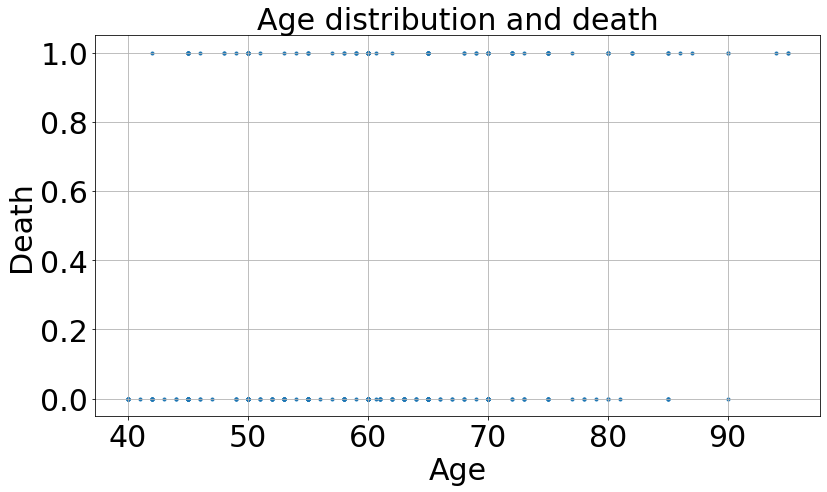

In [4]:
# Reading the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv", names=( 'age', 'anaemia',  
                                                                       'creatinine phosphokinase', 'diabetes',
                                                                       'ejection fraction', 'high blood pressure', 'platelets', 
                                                                       'serum creatinine', 'serum sodium', 'sex', 'smoking',
                                                                       'time', 'death event'))

# Defining the variables 
age = data['age'] # Age of the patient (years)
anaemia = data['anaemia'] # Decrease of red blood cells or hemoglobin (boolean)
HBP = data['high blood pressure'] # If the patient has hypertension (boolean)
CPK = data['creatinine phosphokinase'] # Level of the CPK enzyme in the blood (mcg/L)
diabetes = data['diabetes'] # If the patient has diabetes (boolean)
ejection_fraction = data['ejection fraction'] # Percentage of blood leaving the heart at each contraction (percentage)
platelets = data['platelets'] # Platelets in the blood (kiloplatelets/mL)
sex = data['sex'] # Woman or man (binary)
serum_creatinine = data['serum creatinine'] # Level of serum creatinine in the blood (mg/dL)
serum_sodium = data['serum sodium'] # Level of serum sodium in the blood (mEq/L)
smoking = data['smoking'] # If the patient smokes or not (boolean)
time = data['time'] # Follow-up period (days)
death = data['death event'] # If the patient deceased during the follow-up period (boolean)

display(data)

fig1 = plt.figure(figsize=(13,7))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.scatter(age, death, marker='.')
plt.xlabel('Age',size=30)
plt.ylabel('Death',fontsize=30)
plt.title('Age distribution and death',fontsize=30)
fig1.savefig("death-age.jpg", dpi=150)
plt.xticks(size = 30)
plt.yticks(size = 30)
axes.grid(b=True, which='major', linestyle='-')
plt.show()

# WE HAVE A BINARY OUTPUT = death 0 or 1

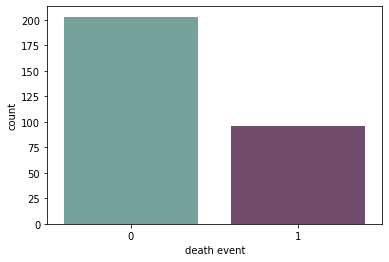

In [5]:
# Plotting a count plot of the targer attribute
# Evaluating the target and finding out if the data is balanced or not

cols= ["#6daa9f","#774571"]
sns.countplot(x= death, palette= cols)

# the data is not balanced!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256757C3C70>,
      dtype=object)

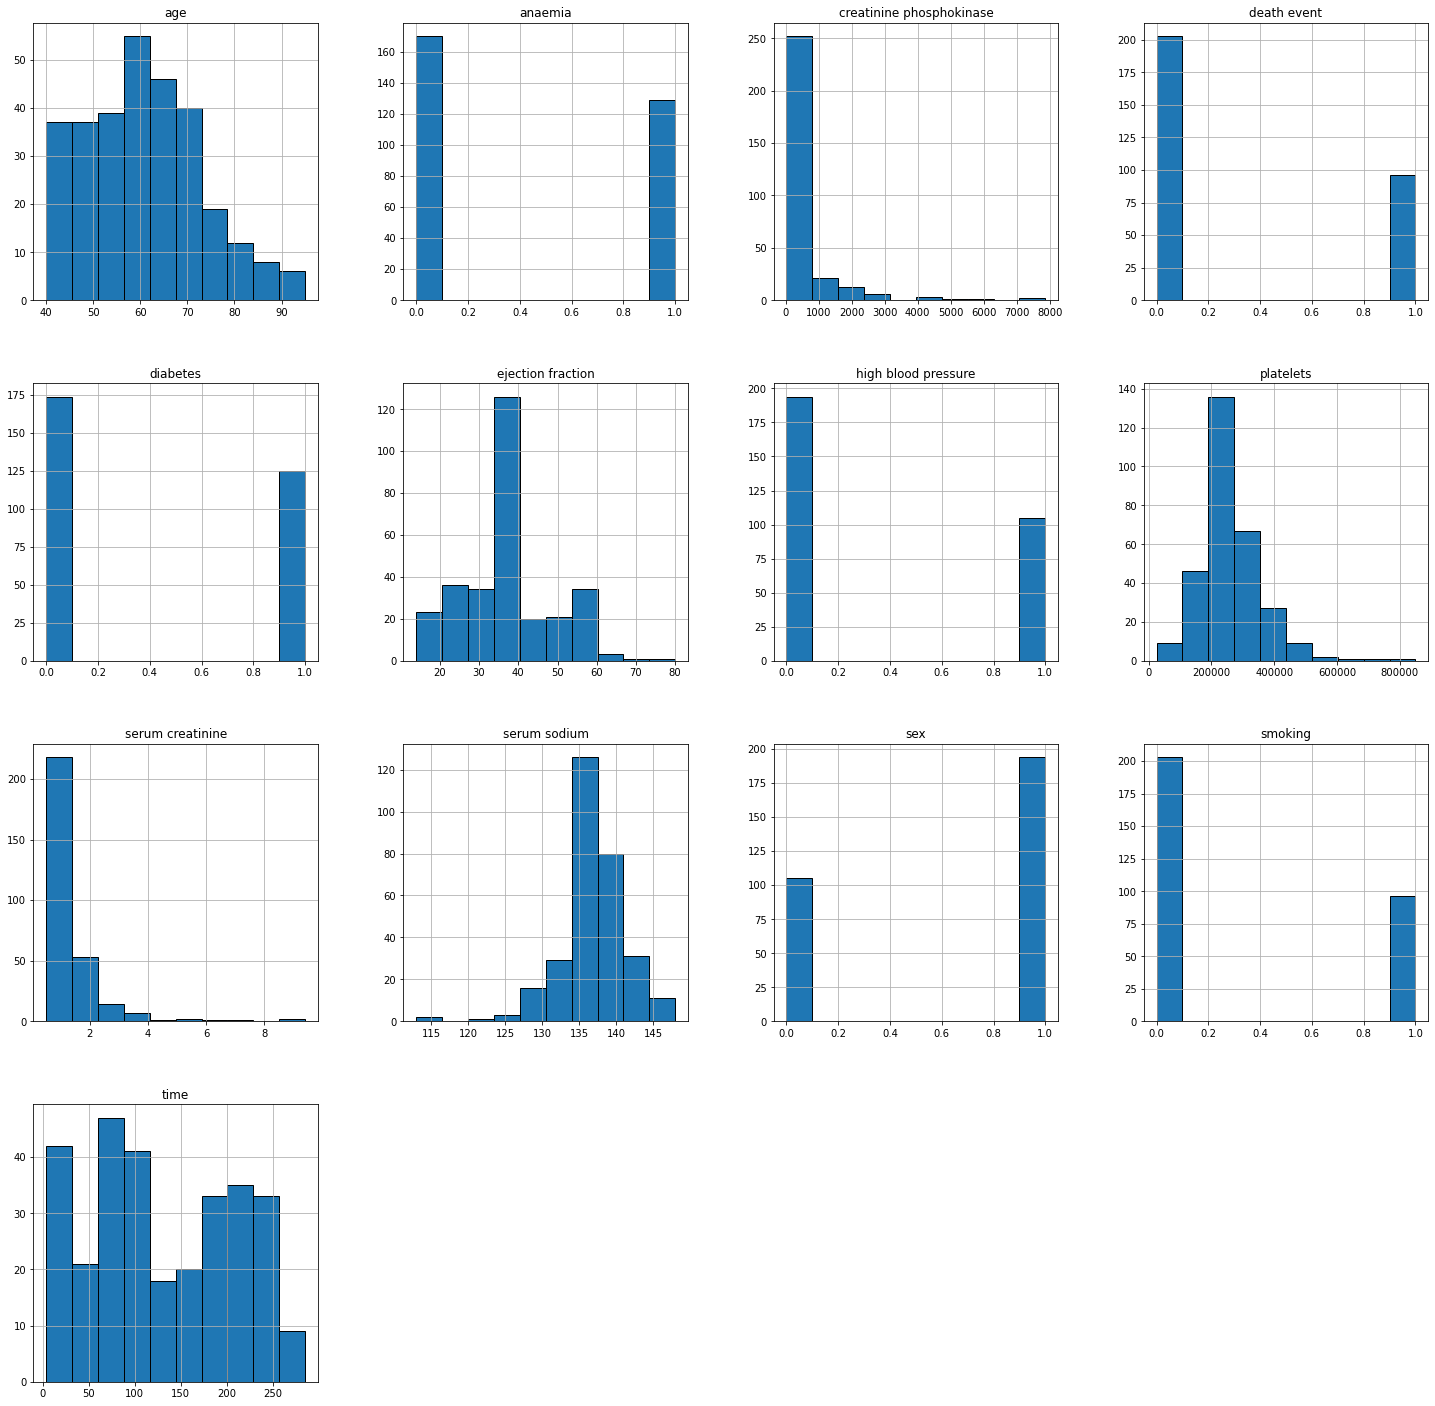

In [6]:
# Visualization of all attributes
data.hist(figsize=(25,25),edgecolor='black')

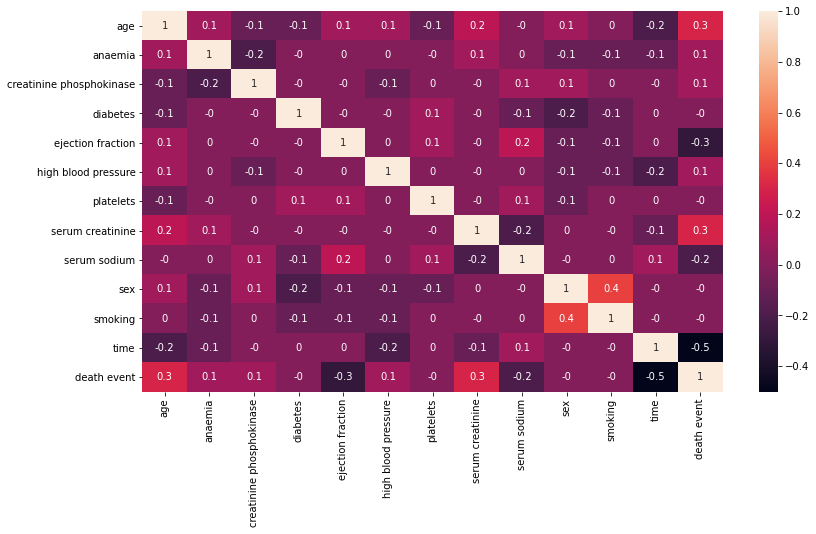

Model feature importances
[0.08875158 0.02760107 0.07639674 0.0305639  0.13385348 0.02339893
 0.06764289 0.11923964 0.08682788 0.02594489 0.02449038 0.29528862]


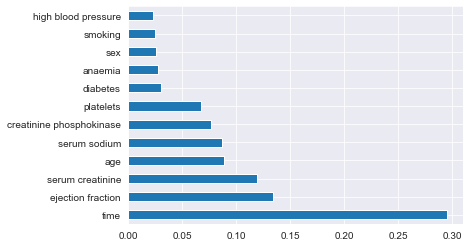

We select the 4 highest correlating features (time, ejection fraction, serum creatine and age) for the analysis.


In [7]:
# Correlation matrix - computing the pair wise correlation for all columns  
correlation_matrix = data.corr().round(1)
#print(correlation_matrix)

# Using the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
fig2 = plt.figure(figsize=(13,7))
sns.heatmap(data=correlation_matrix, annot=True)
fig2.savefig("correlation_matrix.jpg", dpi=150)
plt.show()

# Feature Selection

sns.set_style("darkgrid")
x = data.iloc[:, :-1]
y = data.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(x,y)
print('Model feature importances')
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

print('We select the 4 highest correlating features (time, ejection fraction, serum creatine and age) for the analysis.')

In [8]:
X_selected = data[['age', 'ejection fraction', 'serum creatinine','time']]


# Splitting the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X_selected,death,random_state=0)
# the selected features are what we use to predict
# death is what we want to predict

#print(X_train.shape)
#print(X_test.shape)

# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

#Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg.fit(X_train_scaled, y_train)
print("Test set accuracy Logistic Regression with scaled data: {:.3f}".format(logreg.score(X_test_scaled,y_test)))

Test set accuracy with Logistic Regression before scaling: 0.800
Test set accuracy Logistic Regression with scaled data: 0.787


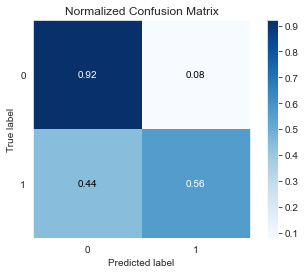

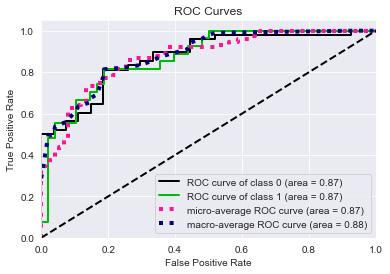

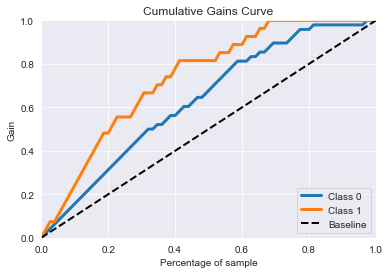

In [9]:
y_pred = logreg.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = logreg.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

Compraring the different models

In [10]:
# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

death_predistions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train,death_predistions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

# Decission tree

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

death_predistions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train,death_predistions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

# OVERFITTING!

0.3534077466759757
0.0


the lower the std the better

In [11]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Better Evaluation Using Cross-Validation

# Decision tree
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print("Decision Trees")
display_scores(tree_rmse_scores)
print("")

# Linear Regression
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
lin_scores = np.sqrt(-lin_scores)
print("Linear regression")
display_scores(lin_scores)
print("")

# Random Forest Classifier
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
forest_scores = np.sqrt(-forest_scores)
print("Random forests")
display_scores(forest_scores)
print("")

# Logistic regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
log_scores = cross_val_score(logreg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
log_scores = np.sqrt(-log_scores)
print("Logistic Regression")
display_scores(log_scores)
print("")

# Support vector machines
svc_reg = SVC()
svc_reg.fit(X_train,y_train)
svc_reg_scores = cross_val_score(svc_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
svc_reg_scores = np.sqrt(-svc_reg_scores)
print("Support vector machines")
display_scores(svc_reg_scores)
print("")

Decision Trees
Scores: [0.36115756 0.58976782 0.41702883 0.36115756 0.47673129 0.36927447
 0.47673129 0.63960215 0.47673129 0.47673129]
Mean: 0.4644913571744368
Standard deviation: 0.08923673083440856

Linear regression
Scores: [0.30342555 0.39943389 0.33153189 0.32128021 0.35984989 0.32134104
 0.38818904 0.45418781 0.3759105  0.3318507 ]
Mean: 0.3587000530559633
Standard deviation: 0.04387993588147763

Random forests
Scores: [0.2983141  0.42394114 0.29821206 0.27756707 0.40454239 0.34673149
 0.31550104 0.4599753  0.39846866 0.32213069]
Mean: 0.3545383945307462
Standard deviation: 0.059378010638909864

Logistic Regression
Scores: [0.36115756 0.29488391 0.41702883 0.36115756 0.36927447 0.30151134
 0.42640143 0.47673129 0.42640143 0.36927447]
Mean: 0.3803822309437557
Standard deviation: 0.05420163171229282

Support vector machines
Scores: [0.36115756 0.4662524  0.29488391 0.20851441 0.42640143 0.36927447
 0.47673129 0.47673129 0.42640143 0.36927447]
Mean: 0.3875622690288364
Standard devi

Another way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will
have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
Scikit-Learn provides a function to compute the ROC AUC.

In [12]:
def plot_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    
# Linear regression

y_score_lin = cross_val_predict(lin_reg, X_train, y_train)
fpr_lin, tpr_lin, threshold_lin = roc_curve(y_train, y_score_lin)

# Decision Trees
y_score_tree = cross_val_predict(tree_reg, X_train, y_train)
fpr_tree, tpr_tree , threshold_tree = roc_curve(y_train, y_score_tree)

# Random Forests
y_score_random = cross_val_predict(forest_reg, X_train, y_train)
fpr_random, tpr_random , threshold_random = roc_curve(y_train, y_score_random)

# Logistic regression
y_score_log = cross_val_predict(logreg, X_train, y_train)
fpr_log, tpr_log, threshold_log = roc_curve(y_train, y_score_log)

# Support vector machines
from sklearn.svm import SVC

svc_reg = SVC()
svc_reg.fit(X_train,y_train)

y_score_svc = cross_val_predict(svc_reg, X_train, y_train)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_train, y_score_svc)


print('ROC-AUC Score Decision Trees: ', roc_auc_score(y_train, y_score_tree))
print('ROC-AUC Score Random Forests: ', roc_auc_score(y_train, y_score_random))
print('ROC-AUC Score Logistic Regression: ', roc_auc_score(y_train, y_score_log))
print('ROC-AUC Score Support vector machines: ', roc_auc_score(y_train, y_score_svc))
print('ROC-AUC Score Linear regession: ', roc_auc_score(y_train, y_score_lin))

ROC-AUC Score Decision Trees:  0.737400654511454
ROC-AUC Score Random Forests:  0.869939223936419
ROC-AUC Score Logistic Regression:  0.8066853669939225
ROC-AUC Score Support vector machines:  0.774520804114072
ROC-AUC Score Linear regession:  0.8855539971949509


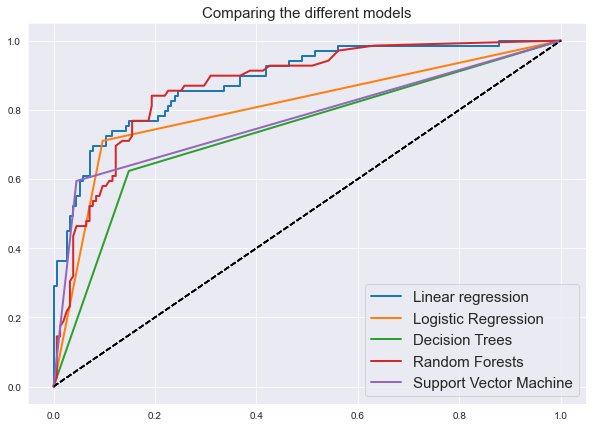

In [13]:
fig100 = plt.figure(figsize=(10,7))
plot_curve(fpr_lin, tpr_lin, label='Linear regression')
plot_curve(fpr_log, tpr_log, label='Logistic Regression')
plot_curve(fpr_tree, tpr_tree, label='Decision Trees')
plot_curve(fpr_random, tpr_random, label='Random Forests')
plot_curve(fpr_svc, tpr_svc, label='Support Vector Machine')

plt.title('Comparing the different models',fontsize=15)
plt.legend(fontsize=15)
fig100.savefig("ROC-curves.jpg", dpi=150)
plt.show()

Artificial Neural Network (ANN) - scikit-learn implementation

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,death,random_state=0)
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
n_hidden_neurons = 50

epochs = 1000

# store models for later use
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(X_train, y_train)
        
        DNN_scikit[i][j] = dnn
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", dnn.score(X_test, y_test))
        print()

Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on test set:  0.7866666666666666



C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on test set:  0.7333333333333333



C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on test set:  0.7866666666666666

Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on test set:  0.76

Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on test set:  0.64



C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on test set:  0.8133333333333334



C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  10.0
Accuracy score on test set:  0.7733333333333333

Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on test set:  0.8133333333333334

Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  0.1
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  1.0
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  10.0
Accuracy score on test set:  0.8133333333333334

Learning rate  =  0.001
Lambda =  1e-05
Accuracy score on test set:  0.84

Learning rate  =  0.001
Lambda =  0.0001
Accuracy score on test set:  0.84

Learning rate  =  0.001
Lambda =  0.001
Accuracy score on test set:  0.8533333333333334

Learning rate  =  0.001
Lambda =  0.01
Accuracy

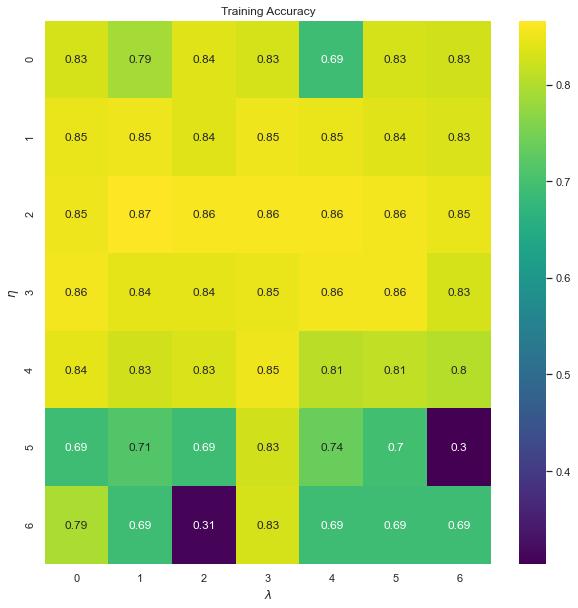

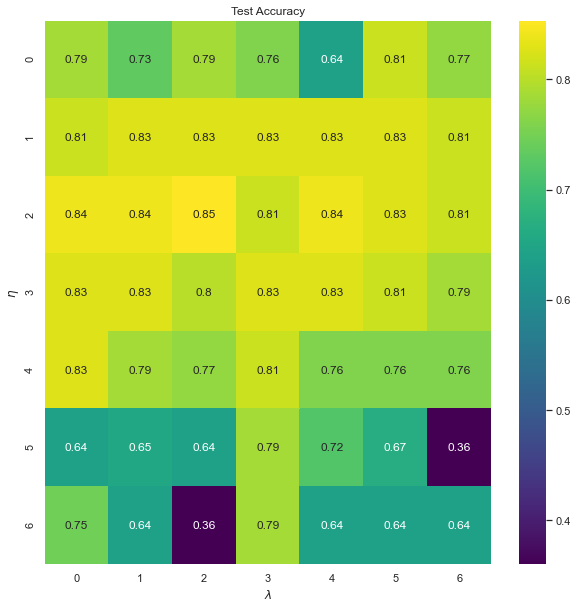

In [15]:
sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(y_test, test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

Constructing a neural network in Tensorflow, using NN by keras

Epoch 1/100
3/3 [==============================] - 0s 985us/step - loss: 0.7103 - accuracy: 0.7085
Epoch 2/100
3/3 [==============================] - 0s 997us/step - loss: 0.7103 - accuracy: 0.6735
Epoch 3/100
3/3 [==============================] - 0s 499us/step - loss: 0.7103 - accuracy: 0.6885
Epoch 4/100
3/3 [==============================] - 0s 997us/step - loss: 0.7103 - accuracy: 0.6985
Epoch 5/100
3/3 [==============================] - 0s 997us/step - loss: 0.7102 - accuracy: 0.7097
Epoch 6/100
3/3 [==============================] - 0s 999us/step - loss: 0.7102 - accuracy: 0.7060
Epoch 7/100
3/3 [==============================] - 0s 997us/step - loss: 0.7102 - accuracy: 0.6647
Epoch 8/100
3/3 [==============================] - 0s 998us/step - loss: 0.7102 - accuracy: 0.6885
Epoch 9/100
3/3 [==============================] - 0s 997us/step - loss: 0.7102 - accuracy: 0.6735
Epoch 10/100
3/3 [==============================] - 0s 998us/step - loss: 0.7101 - accuracy: 0.6835
Epoch 11/

3/3 [==============================] - 0s 997us/step - loss: 0.7086 - accuracy: 0.6897
Epoch 83/100
3/3 [==============================] - 0s 498us/step - loss: 0.7086 - accuracy: 0.6860
Epoch 84/100
3/3 [==============================] - 0s 997us/step - loss: 0.7086 - accuracy: 0.6810
Epoch 85/100
3/3 [==============================] - 0s 998us/step - loss: 0.7085 - accuracy: 0.6835
Epoch 86/100
3/3 [==============================] - 0s 498us/step - loss: 0.7084 - accuracy: 0.6922
Epoch 87/100
3/3 [==============================] - 0s 997us/step - loss: 0.7083 - accuracy: 0.7022
Epoch 88/100
3/3 [==============================] - 0s 499us/step - loss: 0.7085 - accuracy: 0.6797
Epoch 89/100
3/3 [==============================] - 0s 498us/step - loss: 0.7085 - accuracy: 0.6822
Epoch 90/100
3/3 [==============================] - 0s 997us/step - loss: 0.7083 - accuracy: 0.6997
Epoch 91/100
3/3 [==============================] - 0s 499us/step - loss: 0.7084 - accuracy: 0.6860
Epoch 92/100


3/3 [==============================] - 0s 498us/step - loss: 0.6939 - accuracy: 0.6897
Epoch 61/100
3/3 [==============================] - 0s 997us/step - loss: 0.6930 - accuracy: 0.6997
Epoch 62/100
3/3 [==============================] - 0s 998us/step - loss: 0.6938 - accuracy: 0.6860
Epoch 63/100
3/3 [==============================] - 0s 499us/step - loss: 0.6934 - accuracy: 0.6885
Epoch 64/100
3/3 [==============================] - 0s 998us/step - loss: 0.6920 - accuracy: 0.7072
Epoch 65/100
3/3 [==============================] - 0s 997us/step - loss: 0.6934 - accuracy: 0.6835
Epoch 66/100
3/3 [==============================] - 0s 997us/step - loss: 0.6915 - accuracy: 0.7085
Epoch 67/100
3/3 [==============================] - 0s 998us/step - loss: 0.6925 - accuracy: 0.6922
Epoch 68/100
3/3 [==============================] - 0s 997us/step - loss: 0.6927 - accuracy: 0.6872
Epoch 69/100
3/3 [==============================] - 0s 499us/step - loss: 0.6937 - accuracy: 0.6710
Epoch 70/100


3/3 [==============================] - 0s 498us/step - loss: 0.6225 - accuracy: 0.7537
Epoch 39/100
3/3 [==============================] - 0s 998us/step - loss: 0.6210 - accuracy: 0.7597
Epoch 40/100
3/3 [==============================] - 0s 997us/step - loss: 0.6257 - accuracy: 0.7570
Epoch 41/100
3/3 [==============================] - 0s 498us/step - loss: 0.6128 - accuracy: 0.7657
Epoch 42/100
3/3 [==============================] - 0s 998us/step - loss: 0.6136 - accuracy: 0.7657
Epoch 43/100
3/3 [==============================] - 0s 498us/step - loss: 0.6103 - accuracy: 0.7692
Epoch 44/100
3/3 [==============================] - 0s 499us/step - loss: 0.6047 - accuracy: 0.7754
Epoch 45/100
3/3 [==============================] - 0s 499us/step - loss: 0.6065 - accuracy: 0.7604
Epoch 46/100
3/3 [==============================] - 0s 998us/step - loss: 0.6061 - accuracy: 0.7677
Epoch 47/100
3/3 [==============================] - 0s 498us/step - loss: 0.6052 - accuracy: 0.7727
Epoch 48/100


3/3 [==============================] - 0s 997us/step - loss: 3.9731 - accuracy: 0.6822
Epoch 17/100
3/3 [==============================] - 0s 998us/step - loss: 3.5877 - accuracy: 0.6997
Epoch 18/100
3/3 [==============================] - 0s 499us/step - loss: 3.9648 - accuracy: 0.6960
Epoch 19/100
3/3 [==============================] - 0s 997us/step - loss: 3.7420 - accuracy: 0.6910
Epoch 20/100
3/3 [==============================] - 0s 499us/step - loss: 3.8872 - accuracy: 0.6922
Epoch 21/100
3/3 [==============================] - 0s 499us/step - loss: 3.6401 - accuracy: 0.7035
Epoch 22/100
3/3 [==============================] - 0s 998us/step - loss: 3.6439 - accuracy: 0.6860
Epoch 23/100
3/3 [==============================] - 0s 997us/step - loss: 3.4905 - accuracy: 0.6960
Epoch 24/100
3/3 [==============================] - 0s 499us/step - loss: 3.6131 - accuracy: 0.6847
Epoch 25/100
3/3 [==============================] - 0s 997us/step - loss: 3.3150 - accuracy: 0.6972
Epoch 26/100


3/3 [==============================] - 0s 997us/step - loss: 1.5897 - accuracy: 0.7072
Epoch 99/100
3/3 [==============================] - 0s 499us/step - loss: 1.7353 - accuracy: 0.6785
Epoch 100/100
3/3 [==============================] - 0s 1ms/step - loss: 2.3733 - accuracy: 0.6400
Epoch 1/100
3/3 [==============================] - 0s 0s/step - loss: 9.9910 - accuracy: 0.2256
Epoch 2/100
3/3 [==============================] - 0s 997us/step - loss: 4.4980 - accuracy: 0.2784
Epoch 3/100
3/3 [==============================] - 0s 997us/step - loss: 2.3288 - accuracy: 0.2928
Epoch 4/100
3/3 [==============================] - 0s 997us/step - loss: 1.3419 - accuracy: 0.3521
Epoch 5/100
3/3 [==============================] - 0s 997us/step - loss: 0.9029 - accuracy: 0.3526
Epoch 6/100
3/3 [==============================] - 0s 997us/step - loss: 0.7455 - accuracy: 0.6822
Epoch 7/100
3/3 [==============================] - 0s 498us/step - loss: 0.7012 - accuracy: 0.6972
Epoch 8/100
3/3 [=======

3/3 [==============================] - 0s 997us/step - loss: 0.6067 - accuracy: 0.6922
Epoch 77/100
3/3 [==============================] - 0s 997us/step - loss: 0.6452 - accuracy: 0.6735
Epoch 78/100
3/3 [==============================] - 0s 498us/step - loss: 0.6416 - accuracy: 0.6947
Epoch 79/100
3/3 [==============================] - 0s 997us/step - loss: 0.6441 - accuracy: 0.6785
Epoch 80/100
3/3 [==============================] - 0s 997us/step - loss: 0.6395 - accuracy: 0.6897
Epoch 81/100
3/3 [==============================] - 0s 499us/step - loss: 0.6143 - accuracy: 0.7047
Epoch 82/100
3/3 [==============================] - 0s 997us/step - loss: 0.6198 - accuracy: 0.7060
Epoch 83/100
3/3 [==============================] - 0s 997us/step - loss: 0.6170 - accuracy: 0.7135
Epoch 84/100
3/3 [==============================] - 0s 997us/step - loss: 0.6053 - accuracy: 0.7097
Epoch 85/100
3/3 [==============================] - 0s 499us/step - loss: 0.6126 - accuracy: 0.6885
Epoch 86/100


3/3 [==============================] - 0s 998us/step - loss: 0.5197 - accuracy: 0.8053
Epoch 55/100
3/3 [==============================] - 0s 498us/step - loss: 0.5239 - accuracy: 0.8068
Epoch 56/100
3/3 [==============================] - 0s 498us/step - loss: 0.5155 - accuracy: 0.8103
Epoch 57/100
3/3 [==============================] - 0s 998us/step - loss: 0.5024 - accuracy: 0.8153
Epoch 58/100
3/3 [==============================] - 0s 996us/step - loss: 0.5252 - accuracy: 0.7993
Epoch 59/100
3/3 [==============================] - 0s 498us/step - loss: 0.5272 - accuracy: 0.8015
Epoch 60/100
3/3 [==============================] - 0s 997us/step - loss: 0.5185 - accuracy: 0.8040
Epoch 61/100
3/3 [==============================] - 0s 499us/step - loss: 0.4924 - accuracy: 0.8215
Epoch 62/100
3/3 [==============================] - 0s 498us/step - loss: 0.5074 - accuracy: 0.8165
Epoch 63/100
3/3 [==============================] - 0s 997us/step - loss: 0.5183 - accuracy: 0.8028
Epoch 64/100


3/3 [==============================] - 0s 1ms/step - loss: 0.9840 - accuracy: 0.7259
Epoch 33/100
3/3 [==============================] - 0s 997us/step - loss: 0.9867 - accuracy: 0.7390
Epoch 34/100
3/3 [==============================] - 0s 997us/step - loss: 1.0219 - accuracy: 0.7403
Epoch 35/100
3/3 [==============================] - 0s 499us/step - loss: 0.9928 - accuracy: 0.7380
Epoch 36/100
3/3 [==============================] - 0s 499us/step - loss: 0.9989 - accuracy: 0.7510
Epoch 37/100
3/3 [==============================] - 0s 499us/step - loss: 0.9358 - accuracy: 0.7742
Epoch 38/100
3/3 [==============================] - 0s 997us/step - loss: 0.9386 - accuracy: 0.7672
Epoch 39/100
3/3 [==============================] - 0s 499us/step - loss: 0.9922 - accuracy: 0.7497
Epoch 40/100
3/3 [==============================] - 0s 997us/step - loss: 0.9603 - accuracy: 0.7557
Epoch 41/100
3/3 [==============================] - 0s 997us/step - loss: 0.9729 - accuracy: 0.7702
Epoch 42/100
3/

3/3 [==============================] - 0s 498us/step - loss: 1.3567 - accuracy: 0.7966
Epoch 11/100
3/3 [==============================] - 0s 997us/step - loss: 4.8653 - accuracy: 0.5295
Epoch 12/100
3/3 [==============================] - 0s 499us/step - loss: 1.8680 - accuracy: 0.8103
Epoch 13/100
3/3 [==============================] - 0s 499us/step - loss: 1.6885 - accuracy: 0.7513
Epoch 14/100
3/3 [==============================] - 0s 998us/step - loss: 1.4016 - accuracy: 0.8389
Epoch 15/100
3/3 [==============================] - 0s 998us/step - loss: 1.1019 - accuracy: 0.8452
Epoch 16/100
3/3 [==============================] - 0s 499us/step - loss: 1.0628 - accuracy: 0.8075
Epoch 17/100
3/3 [==============================] - 0s 998us/step - loss: 1.8332 - accuracy: 0.7109
Epoch 18/100
3/3 [==============================] - 0s 997us/step - loss: 1.0917 - accuracy: 0.8030
Epoch 19/100
3/3 [==============================] - 0s 497us/step - loss: 0.9536 - accuracy: 0.8232
Epoch 20/100


3/3 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.8544
Epoch 93/100
3/3 [==============================] - 0s 998us/step - loss: 0.6648 - accuracy: 0.8494
Epoch 94/100
3/3 [==============================] - 0s 997us/step - loss: 0.8565 - accuracy: 0.7943
Epoch 95/100
3/3 [==============================] - 0s 498us/step - loss: 0.6709 - accuracy: 0.8511
Epoch 96/100
3/3 [==============================] - 0s 925us/step - loss: 0.6241 - accuracy: 0.8686
Epoch 97/100
3/3 [==============================] - 0s 997us/step - loss: 1.5449 - accuracy: 0.6508
Epoch 98/100
3/3 [==============================] - 0s 998us/step - loss: 0.9573 - accuracy: 0.7524
Epoch 99/100
3/3 [==============================] - 0s 498us/step - loss: 0.6934 - accuracy: 0.8513
Epoch 100/100
3/3 [==============================] - 0s 998us/step - loss: 1.4320 - accuracy: 0.7733
Epoch 1/100
3/3 [==============================] - 0s 1ms/step - loss: 40.7687 - accuracy: 0.3765
Epoch 2/100
3/3 

3/3 [==============================] - 0s 997us/step - loss: 0.7212 - accuracy: 0.7701
Epoch 71/100
3/3 [==============================] - 0s 998us/step - loss: 0.6257 - accuracy: 0.8501
Epoch 72/100
3/3 [==============================] - 0s 499us/step - loss: 0.6912 - accuracy: 0.8501
Epoch 73/100
3/3 [==============================] - 0s 997us/step - loss: 0.6322 - accuracy: 0.8633
Epoch 74/100
3/3 [==============================] - 0s 997us/step - loss: 0.6262 - accuracy: 0.8621
Epoch 75/100
3/3 [==============================] - 0s 499us/step - loss: 0.6005 - accuracy: 0.8623
Epoch 76/100
3/3 [==============================] - 0s 998us/step - loss: 0.6514 - accuracy: 0.8611
Epoch 77/100
3/3 [==============================] - 0s 499us/step - loss: 0.6299 - accuracy: 0.8521
Epoch 78/100
3/3 [==============================] - 0s 997us/step - loss: 0.6234 - accuracy: 0.8513
Epoch 79/100
3/3 [==============================] - 0s 998us/step - loss: 0.6289 - accuracy: 0.8703
Epoch 80/100


3/3 [==============================] - 0s 997us/step - loss: 1.4555 - accuracy: 0.8604
Epoch 49/100
3/3 [==============================] - 0s 998us/step - loss: 1.4687 - accuracy: 0.8030
Epoch 50/100
3/3 [==============================] - 0s 997us/step - loss: 1.4918 - accuracy: 0.7978
Epoch 51/100
3/3 [==============================] - 0s 999us/step - loss: 1.4470 - accuracy: 0.8576
Epoch 52/100
3/3 [==============================] - 0s 998us/step - loss: 1.4602 - accuracy: 0.8676
Epoch 53/100
3/3 [==============================] - 0s 997us/step - loss: 1.4603 - accuracy: 0.8554
Epoch 54/100
3/3 [==============================] - 0s 998us/step - loss: 1.4817 - accuracy: 0.8658
Epoch 55/100
3/3 [==============================] - 0s 997us/step - loss: 1.4718 - accuracy: 0.8454
Epoch 56/100
3/3 [==============================] - 0s 499us/step - loss: 1.4494 - accuracy: 0.8466
Epoch 57/100
3/3 [==============================] - 0s 997us/step - loss: 1.4333 - accuracy: 0.8506
Epoch 58/100


3/3 [==============================] - 0s 997us/step - loss: 1.8127 - accuracy: 0.7787
Epoch 27/100
3/3 [==============================] - 0s 998us/step - loss: 1.6600 - accuracy: 0.8257
Epoch 28/100
3/3 [==============================] - 0s 997us/step - loss: 1.5490 - accuracy: 0.8279
Epoch 29/100
3/3 [==============================] - 0s 998us/step - loss: 1.7369 - accuracy: 0.7841
Epoch 30/100
3/3 [==============================] - 0s 998us/step - loss: 1.7392 - accuracy: 0.8419
Epoch 31/100
3/3 [==============================] - 0s 997us/step - loss: 1.7292 - accuracy: 0.7539
Epoch 32/100
3/3 [==============================] - 0s 997us/step - loss: 1.4598 - accuracy: 0.8596
Epoch 33/100
3/3 [==============================] - 0s 997us/step - loss: 3.0711 - accuracy: 0.5334
Epoch 34/100
3/3 [==============================] - 0s 997us/step - loss: 1.7629 - accuracy: 0.8321
Epoch 35/100
3/3 [==============================] - 0s 1ms/step - loss: 1.6500 - accuracy: 0.8262
Epoch 36/100
3/

3/3 [==============================] - 0s 998us/step - loss: 1.5577 - accuracy: 0.8088
Epoch 5/100
3/3 [==============================] - 0s 997us/step - loss: 1.5177 - accuracy: 0.8379
Epoch 6/100
3/3 [==============================] - 0s 997us/step - loss: 1.5130 - accuracy: 0.8113
Epoch 7/100
3/3 [==============================] - 0s 998us/step - loss: 1.4541 - accuracy: 0.8346
Epoch 8/100
3/3 [==============================] - 0s 998us/step - loss: 1.4474 - accuracy: 0.8474
Epoch 9/100
3/3 [==============================] - 0s 997us/step - loss: 1.4483 - accuracy: 0.8451
Epoch 10/100
3/3 [==============================] - 0s 997us/step - loss: 1.4672 - accuracy: 0.8600
Epoch 11/100
3/3 [==============================] - 0s 997us/step - loss: 1.4303 - accuracy: 0.8491
Epoch 12/100
3/3 [==============================] - 0s 498us/step - loss: 1.4163 - accuracy: 0.8513
Epoch 13/100
3/3 [==============================] - 0s 1ms/step - loss: 1.4562 - accuracy: 0.8366
Epoch 14/100
3/3 [==

3/3 [==============================] - 0s 997us/step - loss: 1.4220 - accuracy: 0.7918
Epoch 87/100
3/3 [==============================] - 0s 998us/step - loss: 1.3191 - accuracy: 0.8646
Epoch 88/100
3/3 [==============================] - 0s 1ms/step - loss: 1.3016 - accuracy: 0.8683
Epoch 89/100
3/3 [==============================] - 0s 998us/step - loss: 1.3201 - accuracy: 0.8533
Epoch 90/100
3/3 [==============================] - 0s 997us/step - loss: 1.2963 - accuracy: 0.8456
Epoch 91/100
3/3 [==============================] - 0s 997us/step - loss: 1.3519 - accuracy: 0.8426
Epoch 92/100
3/3 [==============================] - 0s 997us/step - loss: 1.3146 - accuracy: 0.8586
Epoch 93/100
3/3 [==============================] - 0s 998us/step - loss: 1.2824 - accuracy: 0.8708
Epoch 94/100
3/3 [==============================] - 0s 998us/step - loss: 1.2999 - accuracy: 0.8593
Epoch 95/100
3/3 [==============================] - 0s 998us/step - loss: 1.3260 - accuracy: 0.8406
Epoch 96/100
3/

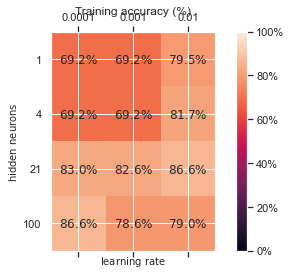

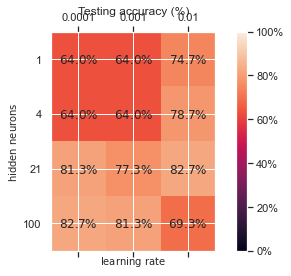

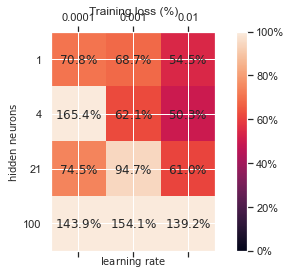

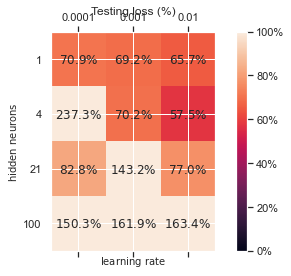

In [16]:


y_train=to_categorical(y_train)     #Convert labels to categorical when using categorical cross entropy
y_test=to_categorical(y_test)

# %%

# Define tunable parameters"

eta=np.logspace(-4,-2,3)                    #Define vector of learning rates (parameter to SGD optimiser)
lamda=0.01                                  #Define hyperparameter
n_layers=2                                  #Define number of hidden layers in the model
n_neuron=np.logspace(0,2,4,dtype=int)       #Define number of neurons per layer
epochs=100                                #Number of reiterations over the input data
batch_size=100                            #Number of samples per gradient update

# %%

"""Define function to return Deep Neural Network model"""

def NN_model(inputsize,n_layers,n_neuron,eta,lamda):
    model=Sequential()      
    for i in range(n_layers):       #Run loop to add hidden layers to the model
        if (i==0):                  #First layer requires input dimensions
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda),input_dim=inputsize))
        else:                       #Subsequent layers are capable of automatic shape inferencing
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda)))
    model.add(Dense(2,activation='softmax'))  #2 outputs - ordered and disordered (softmax for prob)
    sgd=optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

    
Train_accuracy=np.zeros((len(n_neuron),len(eta)))      #Define matrices to store accuracy scores as a function
Test_accuracy=np.zeros((len(n_neuron),len(eta)))       #of learning rate and number of hidden neurons for 
Test_loss=np.zeros((len(n_neuron),len(eta)))  
Train_loss=np.zeros((len(n_neuron),len(eta)))  

for i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate 
    for j in range(len(eta)):      #accuracy scores 
        DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron[i],eta[j],lamda)
        DNN_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
        Train_accuracy[i,j]=DNN_model.evaluate(X_train,y_train)[1]
        Test_accuracy[i,j]=DNN_model.evaluate(X_test,y_test)[1]
        Train_loss[i,j]=DNN_model.evaluate(X_train,y_train)[0]
        Test_loss[i,j]=DNN_model.evaluate(X_test,y_test)[0]
               

def plot_data(x,y,data,title=None):

    # plot results
    fontsize=10


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    
    cbar=fig.colorbar(cax)
    cbar.set_ticks([0,.2,.4,0.6,0.8,1.0])
    cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)
    if title is not None:
        ax.set_title(title)

    plt.tight_layout()

    plt.show() 
plot_data(eta,n_neuron,Train_accuracy, 'Training accuracy (%)')
plot_data(eta,n_neuron,Test_accuracy, 'Testing accuracy (%)')
plot_data(eta,n_neuron,Train_loss, 'Training loss (%)')
plot_data(eta,n_neuron,Test_loss, 'Testing loss (%)')